#### Demo 04: View water column data

## Introduction

This Jupyter Notebook contains an introduction to viewing water column data using Ping.

## Here you will learn

- 

## Short version

At the end of the notebook you will find the important parts of this notebook, compiled into a single cell


## ---

### First: Import the necessary modules

In [1]:
%matplotlib widget
import os
from tqdm.auto import tqdm

import numpy as np

from matplotlib import pyplot as plt
from themachinethatgoesping.echosounders import index_functions
from themachinethatgoesping.echosounders import kongsbergall
import themachinethatgoesping as Ping


In [2]:
# define a list of folder(s) to search for raw data files
folders = []

#folders = ["../unittest_data/"]

#folders.append("/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/05_TURBEAMS_April_2023/Stations")
folders.append("/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/05_TURBEAMS_April_2023/Transect")
folders = [
#    '/home/data/test_data/alex_yolla/'
'/home/data/GEOMAR/examples/watch_wci_example/'
]

# find all .all/.wcd files and cache file positions
files = index_functions.find_files(folders, [".all","wcd"])
cache_files = index_functions.get_cache_file_paths(files)

# open all files and index
fm = kongsbergall.KongsbergAllFileHandler(files,cache_files)    
Ping.pingprocessing.core.clear_memory()

Found 26 files
indexing files ⠐ 100% :08s<00m:00s] [..90528_M143_EM710.all (26/26)]                                
indexing files ⠠ 100% :08s<00m:00s] [Found: 436509 datagrams in 26 files (4753MB)]                                              
Initializing navigation ⢀ 66% :00s<00m:00s] [9/13]          3]          
Initializing ping interface ⠐ 92% :02s<00m:00s] [Done]                                              


## Filter pings
Pings must contain watercolumn amplitudes to view watercolumn data


In [3]:
filtered_pings = Ping.pingprocessing.filter_pings.by_features(fm.get_pings(), ['watercolumn.av'], progress = True)

grouped_pings = Ping.pingprocessing.group_pings.dual_head(filtered_pings, progress = True)
len(grouped_pings), len(fm.get_pings())

(25678, 25678)

In [4]:
del fm 
Ping.pingprocessing.core.clear_memory()

## Plot pings

In [5]:
pss = Ping.echosounders.pingtools.PingSampleSelector()
#pss.select_beam_range_by_angles(-3.5,3.5,1)

plotter = Ping.pingprocessing.widgets.WCIViewer(grouped_pings[::2], ping_sample_selector = pss)

In [6]:
plotter.w_wci_render.value

'linear'

In [26]:
ping_groups = Ping.pingprocessing.split_pings.by_channel_id(filtered_pings)
ping_groups.keys()

dict_keys(['TRX-2004', 'TRX-2031'])

In [6]:
pss = Ping.echosounders.pingtools.PingSampleSelector()
pss.select_beam_range_by_angles(-35,35,3)
echodata = Ping.pingprocessing.watercolumn.echograms.EchoData.from_pings(filtered_pings, pss = pss)

  5%|5         | 1359/25678 [00:01<00:17, 1358.66it/s]

In [7]:
echodata.set_x_axis_date_time()
echodata.set_y_axis_depth()
image, extent = echodata.build_image()

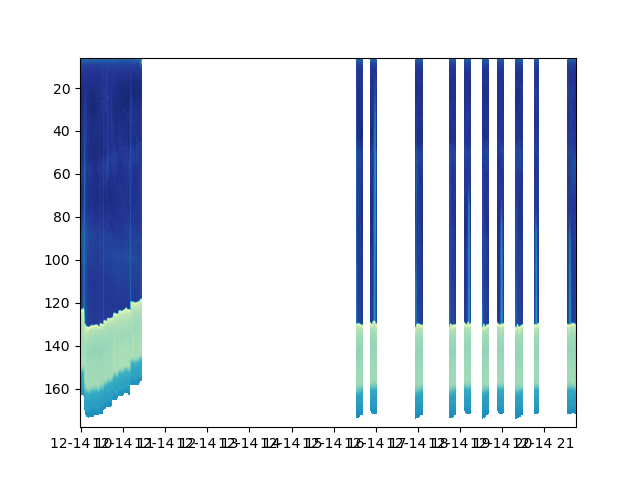

In [8]:

fig,ax = Ping.pingprocessing.core.create_figure("test")
ax.imshow(image.transpose(),extent=extent, cmap='YlGnBu_r', aspect='auto')

In [11]:
from jupyter_ui_poll import ui_events
import ipywidgets

prg = tqdm('ping video')
plotter.stop_botton = ipywidgets.ToggleButton(description = 'loop controll', value = 0)
plotter.layout.children = (*plotter.layout.children, plotter.stop_botton)

plotter.stop_botton.value = 1
display(plotter.stop_botton)


plotter.w_index.value=0
while plotter.stop_botton.value == 1:
    plotter.stop_botton.button_style = 'success'
    di = int(plotter.w_stack.value/2)
    if di < 1: di = 1
    
    i = plotter.w_index.value + di
    if i >= len(plotter.imagebuilder.pings):
        i = 0
        
    plotter.w_index.value = i
    #ipywidgets.
    with ui_events() as ui_poll:
        ui_poll(10) # poll queued UI events including button
    prg.update()
    
plotter.stop_botton.button_style = ''
plotter.layout.children = list(plotter.layout.children[:-1])

  0%|          | 0/10 [00:00<?, ?it/s]

ToggleButton(value=True, description='loop controll')